In [1]:
import numpy as np
import matplotlib.pyplot as plt
                

In [2]:

grid_size = 10
start = (0,0)
goal = (9,9)
obstacles = [(2,3), (3,3), (1,1)]

In [3]:
q_table = np.zeros((grid_size, grid_size, 4))

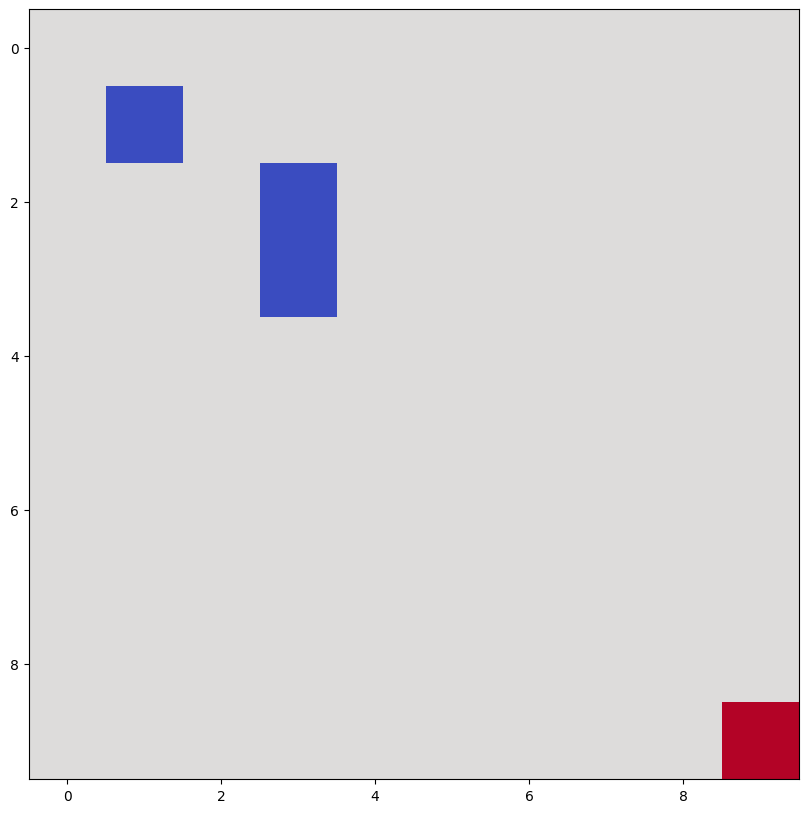

In [4]:
grid = np.zeros((grid_size, grid_size))
for obstacle in obstacles:
    grid[obstacle] = -1
grid[goal] = 1

plt.figure(figsize=(10,10))
plt.imshow(grid, cmap="coolwarm")


In [5]:
actions = [(-1,0), (1,0), (0,1), (0,-1)]

In [6]:
alpha = 0.1
gamma = 0.9
epsilon = 0.99

In [7]:
def get_reward(state):
    if state == goal:
        return 10
    elif state in obstacles:
        return -50
    else:
        return -1



In [8]:
def get_next_state(state, actions):
    next_state=(state[0] + action[0], state[1] + action[1])
    if 0 <= next_state[0] < grid_size and 0 <= next_state[1] < grid_size:
        return next_state
    return state

In [9]:
rewards_per_episode = []  # List to store total rewards for each episode

for episode in range(100):
    state = start
    total_reward = 0  # Initialize total reward for this episode
    
    while state != goal:
        # Choose action using epsilon-greedy strategy
        if np.random.rand() < epsilon:
            action_index = np.random.randint(4)
        else:
            action_index = np.argmax(q_table[state[0], state[1], :])

        action = actions[action_index]
        next_state = get_next_state(state, action)
        
        # Get the reward for this step
        reward = get_reward(next_state)
        
        # Update Q-value
        old_value = q_table[state[0], state[1], action_index]
        next_max = np.max(q_table[next_state[0], next_state[1], :])
        q_table[state[0], state[1], action_index] = old_value + alpha * (reward + gamma * next_max - old_value)
        
        # Accumulate the reward
        total_reward += reward
        
        # Move to the next state
        state = next_state
    
    # Store the total reward for this episode
    rewards_per_episode.append(total_reward)

# Now, `rewards_per_episode` contains 100 numbers, one for each episode

print(rewards_per_episode)

print(max(rewards_per_episode))

maxpoint = max(rewards_per_episode)


[-185, -7278, -515, -1376, -1291, -506, -5383, -641, -827, -399, -1972, -1646, -744, -1008, -628, -2845, -1776, -2410, -3607, -1881, -319, -4333, -1983, -1497, -1302, -7603, -96, -617, -836, -2385, -823, -1521, -513, -426, -315, -2497, -1173, -29, -525, -767, -2018, -659, -1838, -515, -3402, -1712, -1927, -662, -1149, -5221, -811, -375, -374, -198, -523, -198, -1505, -1020, -1159, -615, -3724, -511, -3722, -2852, -3123, -382, -204, -620, -700, -195, -664, -5803, -1493, -707, -211, -2977, -4979, -845, -478, -1371, -1203, -2429, -1077, -2313, -844, -569, -339, -278, -568, -606, -222, -841, -1361, -165, -896, -1318, -560, -1579, -571, -1069]
-29


In [10]:
state = start

In [11]:
path = [state]
while state != goal:
    action_index = np.argmax(q_table[state[0], state[1], :])
    action = actions[action_index]
    state = get_next_state(state, action)
    path.append(state)

print("i got ", path)

i got  [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


<function matplotlib.pyplot.show(close=None, block=None)>

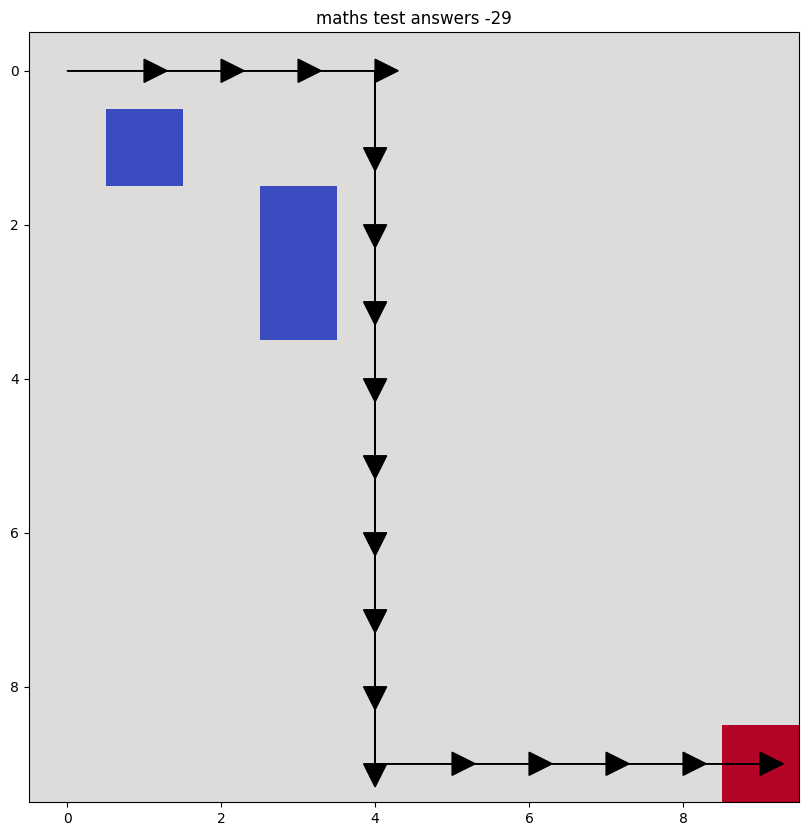

In [12]:
grid = np.zeros((grid_size, grid_size))
for obstacle in obstacles:
    grid[obstacle] = -1
grid[goal] = 1

plt.figure(figsize=(10,10))
plt.imshow(grid, cmap="coolwarm")

for i in range(len(path) - 1):
    current = path[i]
    next_ = path[i+1]
    plt.arrow(
        current[1], current[0],
        next_[1] - current[1], next_[0] - current[0],
        head_width = 0.3, head_length= 0.3, fc = "black", ec="black"
        
    )



plt.title("maths test answers " + str(maxpoint))
plt.show